<a id='top'></a><a name='top'></a>
# Chapter 13: Positional Encoding in Transformer Models

* [Introduction](#introduction)
* [13.0 Imports and Setup](#13.0)
* [13.1 What is Positional Encoding](#13.1)
* [13.2 Positional Encoding Layer in Transformers](#13.2)
* [13.3 Coding the Positional Encoding Matrix from Scratch](#13.3)
* [13.4 Understanding the Positional Encoding Matrix](#13.4)
* [Extra](#extra)

---
<a name='introduction'></a><a id='introduction'></a>
# Introduction
<a href="#top">[back to top]</a>

In the Transformer model, positional information is added to the model explicitly to retain the information regarding the order of words in a sequence. Positional encoding is the schema through which the knowledge of order of objects in a sequence is maintained.

### Dataset

* Toy sequence.


### Explore

* What is positional encoding, and why it's important.
* Positional and encoding in transformers.
* Code and visualize a positional encoding matrix in Python using NumPy.

---
<a name='13.0'></a><a id='13.0'></a>
# 13.0 Imports and Setup
<a href="#top">[back to top]</a>

In [1]:
req_file = "requirements_13.txt"

In [2]:
%%writefile {req_file}
isort
scikit-learn-intelex
watermark

Overwriting requirements_13.txt


In [3]:
import sys
IS_COLAB = 'google.colab' in sys.modules

if IS_COLAB:
    print("Installing packages")
    !pip install --upgrade --quiet -r {req_file}
else:
    print("Running locally.")

# Need to import before sklearn
from sklearnex import patch_sklearn
patch_sklearn()

Running locally.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
%%writefile imports.py
import locale
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
from watermark import watermark

Overwriting imports.py


In [4]:
!isort imports.py --sl
!cat imports.py

import locale
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
from watermark import watermark


In [5]:
import locale
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
from watermark import watermark

In [6]:
def HR():
    print("-"*40)
    
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding
warnings.filterwarnings('default')
BASE_DIR = '.'
sns.set_style("darkgrid")
tqdm.pandas(desc="progress-bar")
pp = pprint.PrettyPrinter(indent=4)

seed = 42

print(watermark(iversions=True,globals_=globals(),python=True,machine=True))

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.34.0

Compiler    : Clang 13.0.0 (clang-1300.0.29.3)
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

seaborn   : 0.12.1
numpy     : 1.23.5
matplotlib: 3.6.2



---
<a name='13.1'></a><a id='13.1'></a>
# 13.1 What is Positional Encoding
<a href="#top">[back to top]</a>

* Positional encoding describes the location of an entity in a sequence, where each position is assigned a unique representation.
* Transformers used a positional encoding schema where each position is mapped to a vector. 
* The positional encoding layer output is a matrix, where each row of the matrix represents an encoded object of the sequence summed with its positional information.

---
<a name='13.2'></a><a id='13.2'></a>
# 13.2 Positional Encoding Layer in Transformers
<a href="#top">[back to top]</a>

* We can use sine and cosine functions to implement positional encoding.

---
<a name='13.3'></a><a id='13.3'></a>
# 13.3 Coding the Positional Encoding Matrix from Scratch
<a href="#top">[back to top]</a>

In [31]:
def getPositionEncoding(seq_len, dim, n=10_000, debug=False):
    P = np.zeros((seq_len, dim))
    
    for k in range(seq_len):
        for i in np.arange(int(dim/2)):
            denominator = np.power(n, 2*i/dim)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
            if debug:
                print(f"input sequence index: {k},  column index: {i}")
                print(P)
                HR()

    return P


# seq_len: rows, dim: columns
P = getPositionEncoding(seq_len=4, dim=4, n=100, debug=True)
HR()

print("Positional encoding as computed:")
print(P)

input sequence index: 0,  column index: 0
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
----------------------------------------
input sequence index: 0,  column index: 1
[[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
----------------------------------------
input sequence index: 1,  column index: 0
[[0.         1.         0.         1.        ]
 [0.84147098 0.54030231 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
----------------------------------------
input sequence index: 1,  column index: 1
[[0.         1.         0.         1.        ]
 [0.84147098 0.54030231 0.09983342 0.99500417]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
----------------------------------------
input sequence index: 2,  column index: 0
[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.4161468

---
<a name='13.4'></a><a id='13.4'></a>
# 13.4 Understanding the Positional Encoding Matrix
<a href="#top">[back to top]</a>

* Examine the sine wave for different positions with `n=10_000` and `d=512`.
* Each position `k` corresponds to a different sinusoid, which encodes a single position into a vector.
* The wavelengths of the sinusoids form a geometric progression and vary from 2pi to 2pi*n.

**Notes:**
1. The sine and cosine functions have values in [-1, 1], which keep the values of the positional encoding matrix in a normalized range.
2. As the sinusoid for each position is different, you have a unique way of encoding each position.
3. You have a way of measuring or quantifying the similarity between different positions, hence enabling us to encode the relative positions of words.




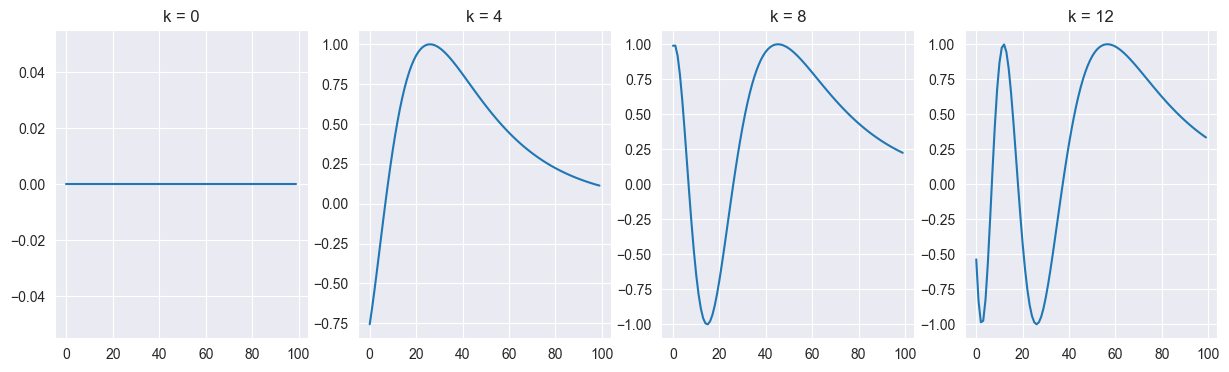

In [58]:
def plotSinusoid(k, d=512, n=10_000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
    
    
fig = plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)
    
plt.show()

**Visualize the positional matrix on bigger values**

* Here, each position `k` corresponds to a different sinusoid, which encodes a single position into a vector.
* Use the `matshow()` method, with `n=10_000`.


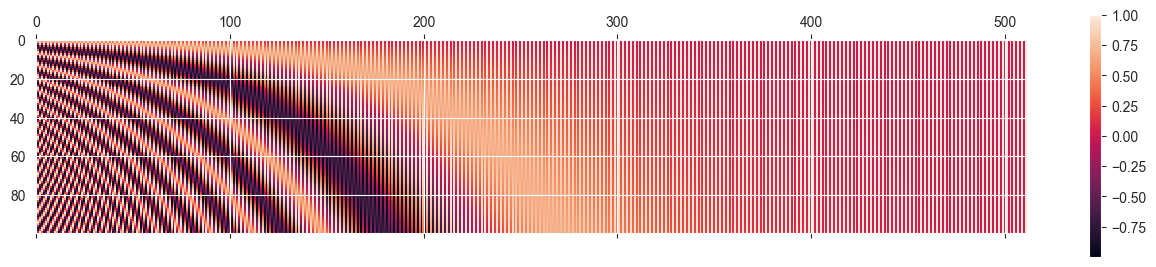

In [63]:
P = getPositionEncoding(seq_len=100, dim=512, n=10_000)
cax = plt.matshow(P)
plt.colorbar(cax)
plt.show()